# Effect of Party Division of Legislative Branch on the Stock Market

## Overview

The goal of our project was to determine the effect a gridlocked government has on stock market returns. We analyzed this using Dow Jones and S&P 500 data from 1928-2019, and the party division data throughout U.S. history. After performing both t-test and graphical analysis, we were not able to find a significant correlation between gridlocked government and stock market returns. However, it is important to note that we lacked enough data for the gridlocked situation, which could have led to a different outcome.



## Names

- Euicheon Hwang
- William Luu
- Yuhan Liu
- Alan Zhang

## Research Question

“If House is controlled by one party and the Senate is controlled by the other, will the stock market perform better?”


## Background and Prior Work

1.Why is this question of interest to your group?
<br>As the November election in the United States comes to an end, the fate of a Democratic controlled government rests upon the runoff Senate races in the state of Georgia. Many financial analysts and conservatives political commentators are hoping for a Republican senate as incumbent President Donald Trump lost the presidential election. They thought that a Republican senate would bring stability to a Democratic controlled White House and House of Representatives as the Democrats would have to work with Republicans to pass the bill. This would dissuade the democrats from making radical changes that invite chaos into the market and prevent many bills from reaching the desk of the President of the United States. Analysts and Commentators argue that the less bills that get through Congress, the less businesses will have to adjust their day-to-day operations[1]. Since investors love stability and certainty of growth, they are more likely to invest in stocks and businesses when they have a high degree of confidence that the legislative branch would not disrupt the business landscape very much.
 
In this project, we want to figure out whether these claims are true or just talking points for the conservative media. We want to learn about the effect a gridlocked government has on the stock market. To do this, we will be tracking the Dow Jones Industrial Average, which tracks the stock performance of the 30 largest publicly traded companies and S&P 500, a tracker for the top 500 largest publicly traded companies in the U.S. stock market. 


According to Barrons, Ed Yardeni of Yardeni Research found that the S&P 500 aggregate around 49% on average during periods of one-party domination. But a gridlocked government produced returns of 60% on average. Invesco, however, suggests that there is no clear correlation between stock market growth and gridlocked government[2].

All conservtive medias currently suggest that a gridlocked government would be the best outcome for the economy as it provides political stability for the business landscape. However, a new study emerged as we were making progress towards our project. The Wall Street Journal claims that a gridlocked government “has been virtually no difference in the annual return of the S&P 500” and that one party-controlled government actually has a higher average return on the S&P 500 as compared to when power is split across party lines[3].
	
This study would be able to debunk the myth that gridlocked government is in fact good for the stock market and maybe for the economy as a whole.


[1] https://www.barrons.com/articles/washington-gridlock-is-usually-good-for-stocks-why-it-might-not-be-this-time-51604401202
<br>[2] https://www.invesco.com/apac/en/institutional/insights/market-outlook/uncommon-truths-is-gridlock-good-for-stocks.html
<br>[3] https://www.wsj.com/articles/political-gridlock-is-supposed-to-be-good-for-stocks-the-data-dont-support-that-11604847910 

## Hypothesis

Based on many sources and unconfirmed claims, we hypothesize that the gridlock government will yield more returns in the stock market because of the political stability corporations and businesses enjoy. The domination of a one party controlled U.S. government will stifle growth and rouse uncertainty in the stock market.


## Dataset(s)

For data, we will be aggregating multiple datasets from different sources. We will use the party division in the U.S. government to determine whether there is a gridlock in the government. Dow Jones Industrial Average and the S&P 500 will also be used to determine the magnitude of return in the stock market and determine whether there is growth or not.

- Dow Jones - https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
  <br>Includes 
   <br>- Year
   <br>- Year’s closing value
   <br>- Change in points and  % change in index
   <br>- 135 observations
- S&P 500 - https://en.wikipedia.org/wiki/S%26P_500_Index
  <br>Includes
   <br>- Year
   <br>- Change in Index
   <br>- Total Annual Return Including Dividends
   <br>- Value of $1.00 Invested on January 1, 1970
   <br>- 5 Year Annualized Return
   <br>- 10 Year Annualized Return
   <br>- 92 observattions
- Congress Party Composition - https://en.wikipedia.org/wiki/Party_divisions_of_United_States_Congresses
   <br>117 observations
   <br>Includes
    <br>-- Congress Number
    <br>-- Years
     <br>- Senate Composition
     <br>- Total
     <br>- Party 1
     <br>- Party 2
     <br>- Others
     <br>- Vacancies
    <br>-- House of Representatives Composition
     <br>- Total
     <br>- Party 1
     <br>- Party 2
     <br>- Others
     <br>- Vacancies



## Setup

In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
!pip install html5lib
import html5lib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.ar_model import AutoReg

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## Data Analysis

### Data Cleaning & Pre-processing

For S&P 500 returns on Wikipedia, it only included data from 1970 onwards so I had to get additional data from Yahoo finance, which is not as nice as the table on the wiki page. The Yahoo Finance csv file includes the monthly opening values and closing values of the S&P 500 but does not include the return of the stock that year. We used the data to calculate the annual return based on the opening and closing value of the stock at the beginning and end of the year and remove all other unnecessary data. After cleaning the Yahoo finance csv file, we merged it with the table we scraped from wikipedia.
 
Dow Jones was cleaned for us and we just took the change in points column from wikipedia table.
 
We did a little bit of cleaning on the Wikipedia page since we’re only concerned whether the government is gridlock or not as opposed to the party numbers in the legislative branch. We calculated whether the government is gridlocked or not based on a few criterias and aggregated with our stock market indices.


In [2]:
df_party = pd.read_html('https://en.wikipedia.org/wiki/Party_divisions_of_United_States_Congresses')
df_party = df_party[0]
df_party = df_party.dropna(how = 'all')
df_party.reset_index(drop = True, inplace = True)
df_party = df_party.drop([3,19, 26, 36,38,122,123])
df_party.reset_index(drop = True, inplace = True)
df_party

Congress      Years Unnamed: 2_level_0              Senate  \
    Congress      Years Unnamed: 2_level_1               Total   
0        1st  1789–1791                 26                   8   
1        2nd  1791–1793                 30                  13   
2        3rd  1793–1795                 30                  14   
3        4th  1795–1797                 32                  11   
4        5th  1797–1799                 32                  10   
..       ...        ...                ...                 ...   
112    113th  2013–2015                100                  53   
113    114th  2015–2017                100                  44   
114    115th  2017–2019                100               46/47   
115    116th  2019–2021                100                  45   
116    117th  2021–2023            100[30]  [to be determined]   

                                                      Unnamed: 8_level_0  \
          Anti-Admin[2] Pro-Admin[3] Others Vacancies Unnamed: 8_level_1   
0                    18            —      —        65                 28   
1                    16            —      1        69                 30   
2                    16            —      —       105                 54   
3                    21            —      —       106                 59   
4                    22            —      —       106                 49   
..                  ...          ...    ...       ...                ...   
112                  45        2[29]      —       435                201   
113                  54        2[29]      —       435                188   
114               52/51        2[29]      —       435                194   
115                  53        2[29]      —       435                235   
116  [to be determined]        2[29]      —       435                222   

    House of Representatives                                                 \
                       Total    Anti-Admin Pro-Admin                 Others   
0                         37             —         —      George Washington   
1                         39             —         —      George Washington   
2                         51             —         —      George Washington   
3                         47             —         —   George Washington[4]   
4                         57             —         —             John Adams   
..                       ...           ...       ...                    ...   
112                      234             —         —           Barack Obama   
113                      247             —         —           Barack Obama   
114                      241             —         —           Donald Trump   
115                      200  Donald Trump       NaN                    NaN   
116                      213             —         —  Joe Biden (elect)[31]   

              Unnamed: 14_level_0 President  
    Vacancies Unnamed: 14_level_1 President  
0         NaN                 NaN       NaN  
1         NaN                 NaN       NaN  
2         NaN                 NaN       NaN  
3         NaN                 NaN       NaN  
4         NaN                 NaN       NaN  
..        ...                 ...       ...  
112       NaN                 NaN       NaN  
113       NaN                 NaN       NaN  
114       NaN                 NaN       NaN  
115       NaN                 NaN       NaN  
116       NaN                 NaN       NaN  

[117 rows x 16 columns]

In [3]:
df_party['Year_start'] = df_party.ix[:,1].str.slice(0,4)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:993: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)


In [4]:
df_party.columns = df_party.columns.droplevel()
df_party.columns = ['Congress', 'Years', 'Total-Senate', 'Democrats-Senate',
       'Republicans-Senate', 'Others-Senate', 'Vacancies-Senate', 'Total-House',
       'Democrats-House', 'Republicans-House', 'Others-House', 'Vacancies-House',
       'President', '','','','Year_start']
df_party=df_party.dropna(axis=1, how = 'all')
df_party

,Congress,Years,Total-Senate,Democrats-Senate,Republicans-Senate,Others-Senate,Vacancies-Senate,Total-House,Democrats-House,Republicans-House,Others-House,Vacancies-House,President,Year_start
0,1st,1789–1791,26,8,18,—,—,65,28,37,—,—,George Washington,1789
1,2nd,1791–1793,30,13,16,—,1,69,30,39,—,—,George Washington,1791
2,3rd,1793–1795,30,14,16,—,—,105,54,51,—,—,George Washington,1793
3,4th,1795–1797,32,11,21,—,—,106,59,47,—,—,George Washington[4],1795
4,5th,1797–1799,32,10,22,—,—,106,49,57,—,—,John Adams,1797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113th,2013–2015,100,53,45,2[29],—,435,201,234,—,—,Barack Obama,2013
113,114th,2015–2017,100,44,54,2[29],—,435,188,247,—,—,Barack Obama,2015
114,115th,2017–2019,100,46/47,52/51,2[29],—,435,194,241,—,—,Donald Trump,2017
115,116th,2019–2021,100,45,53,2[29],—,435,235,200,Donald Trump,NaN,NaN,2019


In [5]:
df_party['Democrats-Senate']=df_party['Democrats-Senate'].replace('46/47', '46')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_party['Democrats-Senate']=df_party['Democrats-Senate'].replace('56–58[26]', '57')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_party['Democrats-Senate']=df_party['Democrats-Senate'].replace('50[22]', '50')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_party.drop(df_party.tail(1).index,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df_party

,Congress,Years,Total-Senate,Democrats-Senate,Republicans-Senate,Others-Senate,Vacancies-Senate,Total-House,Democrats-House,Republicans-House,Others-House,Vacancies-House,President,Year_start
0,1st,1789–1791,26,8,18,—,—,65,28,37,—,—,George Washington,1789
1,2nd,1791–1793,30,13,16,—,1,69,30,39,—,—,George Washington,1791
2,3rd,1793–1795,30,14,16,—,—,105,54,51,—,—,George Washington,1793
3,4th,1795–1797,32,11,21,—,—,106,59,47,—,—,George Washington[4],1795
4,5th,1797–1799,32,10,22,—,—,106,49,57,—,—,John Adams,1797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,112th,2011–2013,100,51,47,2[28],—,435,193,242,—,—,Barack Obama,2011
112,113th,2013–2015,100,53,45,2[29],—,435,201,234,—,—,Barack Obama,2013
113,114th,2015–2017,100,44,54,2[29],—,435,188,247,—,—,Barack Obama,2015
114,115th,2017–2019,100,46,52/51,2[29],—,435,194,241,—,—,Donald Trump,2017


In [10]:
df_party['Year_start']=df_party['Year_start'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_party['Democrats-Senate']=df_party['Democrats-Senate'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_party['Republicans-Senate']=df_party['Republicans-Senate'].replace('50/49[23]', '50')
df_party['Republicans-Senate']=df_party['Republicans-Senate'].replace('40–42[27]', '41')
df_party['Republicans-Senate']=df_party['Republicans-Senate'].replace('52/51', '52')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Note that for the data cleaning of replacement, the reference number may change in the wikipedia, causing the above methods to not working. Tell us if that happened!  

In [13]:
df_party['Republicans-Senate']=df_party['Republicans-Senate'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We can see from this plot that the majority party of senate for each United States Congress changed frequently.

In [14]:
df_party['Democrats-House']=df_party['Democrats-House'].astype(int)
df_party['Republicans-House']=df_party['Republicans-House'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_party['senate_majority'] = np.where((df_party['Democrats-Senate'] > df_party['Republicans-Senate'])
                     , 'Democrats', 'Republicans')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_party['whether_same'] = np.where(((df_party['Democrats-Senate'] == df_party['Republicans-Senate']) |(df_party['Democrats-House'] == df_party['Republicans-House']) )
                     , 'Yes', 'No')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df_party

,Congress,Years,Total-Senate,Democrats-Senate,Republicans-Senate,Others-Senate,Vacancies-Senate,Total-House,Democrats-House,Republicans-House,Others-House,Vacancies-House,President,Year_start,senate_majority,whether_same
0,1st,1789–1791,26,8,18,—,—,65,28,37,—,—,George Washington,1789,Republicans,No
1,2nd,1791–1793,30,13,16,—,1,69,30,39,—,—,George Washington,1791,Republicans,No
2,3rd,1793–1795,30,14,16,—,—,105,54,51,—,—,George Washington,1793,Republicans,No
3,4th,1795–1797,32,11,21,—,—,106,59,47,—,—,George Washington[4],1795,Republicans,No
4,5th,1797–1799,32,10,22,—,—,106,49,57,—,—,John Adams,1797,Republicans,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,112th,2011–2013,100,51,47,2[28],—,435,193,242,—,—,Barack Obama,2011,Democrats,No
112,113th,2013–2015,100,53,45,2[29],—,435,201,234,—,—,Barack Obama,2013,Democrats,No
113,114th,2015–2017,100,44,54,2[29],—,435,188,247,—,—,Barack Obama,2015,Republicans,No
114,115th,2017–2019,100,46,52,2[29],—,435,194,241,—,—,Donald Trump,2017,Republicans,No


In [18]:
df_party['whether_same'].value_counts()

No     112
Yes      4
Name: whether_same, dtype: int64

In [19]:
df_party['house_majority'] = np.where((df_party['Democrats-House'] > df_party['Republicans-House'])
                     , 'Democrats', 'Republicans')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_party['whether_gridlocked'] = np.where((df_party['senate_majority'] == df_party['house_majority'])
                     , 'No', 'Yes')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df_party

,Congress,Years,Total-Senate,Democrats-Senate,Republicans-Senate,Others-Senate,Vacancies-Senate,Total-House,Democrats-House,Republicans-House,Others-House,Vacancies-House,President,Year_start,senate_majority,whether_same,house_majority,whether_gridlocked
0,1st,1789–1791,26,8,18,—,—,65,28,37,—,—,George Washington,1789,Republicans,No,Republicans,No
1,2nd,1791–1793,30,13,16,—,1,69,30,39,—,—,George Washington,1791,Republicans,No,Republicans,No
2,3rd,1793–1795,30,14,16,—,—,105,54,51,—,—,George Washington,1793,Republicans,No,Democrats,Yes
3,4th,1795–1797,32,11,21,—,—,106,59,47,—,—,George Washington[4],1795,Republicans,No,Democrats,Yes
4,5th,1797–1799,32,10,22,—,—,106,49,57,—,—,John Adams,1797,Republicans,No,Republicans,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,112th,2011–2013,100,51,47,2[28],—,435,193,242,—,—,Barack Obama,2011,Democrats,No,Republicans,Yes
112,113th,2013–2015,100,53,45,2[29],—,435,201,234,—,—,Barack Obama,2013,Democrats,No,Republicans,Yes
113,114th,2015–2017,100,44,54,2[29],—,435,188,247,—,—,Barack Obama,2015,Republicans,No,Republicans,No
114,115th,2017–2019,100,46,52,2[29],—,435,194,241,—,—,Donald Trump,2017,Republicans,No,Republicans,No


In [22]:
df_party1 = df_party[['Years', 'senate_majority', 'house_majority','Year_start','whether_gridlocked','whether_same']]
df_party1.set_index('Years',inplace = True)
df_party1

,senate_majority,house_majority,Year_start,whether_gridlocked,whether_same
Years,,,,,
1789–1791,Republicans,Republicans,1789,No,No
1791–1793,Republicans,Republicans,1791,No,No
1793–1795,Republicans,Democrats,1793,Yes,No
1795–1797,Republicans,Democrats,1795,Yes,No
1797–1799,Republicans,Republicans,1797,No,No
...,...,...,...,...,...
2011–2013,Democrats,Republicans,2011,Yes,No
2013–2015,Democrats,Republicans,2013,Yes,No
2015–2017,Republicans,Republicans,2015,No,No


In [23]:
government=df_party1
government

,senate_majority,house_majority,Year_start,whether_gridlocked,whether_same
Years,,,,,
1789–1791,Republicans,Republicans,1789,No,No
1791–1793,Republicans,Republicans,1791,No,No
1793–1795,Republicans,Democrats,1793,Yes,No
1795–1797,Republicans,Democrats,1795,Yes,No
1797–1799,Republicans,Republicans,1797,No,No
...,...,...,...,...,...
2011–2013,Democrats,Republicans,2011,Yes,No
2013–2015,Democrats,Republicans,2013,Yes,No
2015–2017,Republicans,Republicans,2015,No,No


In [24]:
df_party1.to_csv(r'C:\Program Files\Common Files\csv\gridlocked_dataframe.csv', header = True)

In [25]:
df_party['whether_gridlocked'].value_counts()

No     93
Yes    23
Name: whether_gridlocked, dtype: int64

In [26]:
df_gridlocked = df_party[df_party['whether_gridlocked']== 'Yes']

In [27]:
df_gridlocked

,Congress,Years,Total-Senate,Democrats-Senate,Republicans-Senate,Others-Senate,Vacancies-Senate,Total-House,Democrats-House,Republicans-House,Others-House,Vacancies-House,President,Year_start,senate_majority,whether_same,house_majority,whether_gridlocked
2,3rd,1793–1795,30,14,16,—,—,105,54,51,—,—,George Washington,1793,Republicans,No,Democrats,Yes
3,4th,1795–1797,32,11,21,—,—,106,59,47,—,—,George Washington[4],1795,Republicans,No,Democrats,Yes
18,19th,1825–1827,48,26,22,—,—,213,104,109,—,—,John Quincy Adams[6],1825,Democrats,No,Republicans,Yes
22,23rd,1833–1835,48,20,26,2,—,240,143,63,34,—,Andrew Jackson,1833,Republicans,No,Democrats,Yes
27,28th,1843–1845,52,23,29,—,—,223,147,72,4,—,John Tyler[7],1843,Republicans,No,Democrats,Yes
29,30th,1847–1849,60,38,21,1,—,230,110,116,4,—,James K. Polk,1847,Democrats,No,Republicans,Yes
33,34th,1855–1857,62,39,21,2,—,234,83,100,51,—,Franklin Pierce,1855,Democrats,No,Republicans,Yes
35,36th,1859–1861,66,38,26,2,—,237,101,113,23,—,James Buchanan,1859,Democrats,No,Republicans,Yes
43,44th,1875–1877,76,29,46,—,1,293,181,107,3,2,Ulysses S. Grant,1875,Republicans,No,Democrats,Yes
44,45th,1877–1879,76,36,39,1,—,293,156,137,—,—,Rutherford B. Hayes,1877,Republicans,No,Democrats,Yes


In [28]:
SP500_wiki = 'https://en.wikipedia.org/wiki/S%26P_500_Index'
page = requests.get(SP500_wiki)
soup = BeautifulSoup(page.content, 'html.parser')

In [29]:
title_page = soup.title.string

In [30]:
right_table = soup.find(class_='wikitable mw-collapsible sortable')

In [31]:
year, change = [], []

for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) != 9:
        continue
    # This catches when the name cells stops having a link
    #  and ends, skipping the last (summary rows)
    try:
        year.append(cells[0].find(text=True))
        change.append(cells[1].find(text=True))
    except:
        break

In [32]:
for index, yr in enumerate(year):
    year[index] = yr.replace('\n', '')
for index, changes in enumerate(change):
    change[index] = changes.replace('\n', '')

In [33]:
sp500 = pd.DataFrame({'Year': year, '% Change': change})
sp500 = sp500.set_index('Year')

In [34]:
sp500

,% Change
Year,
1970,0.10%
1971,10.79%
1972,15.63%
1973,−17.37%
1974,−29.72%
1975,31.55%
1976,19.15%
1977,−11.50%
1978,1.06%


In [35]:
additional_data = pd.read_csv('^GSPC.csv')
additional_data = additional_data[additional_data['Date'].str.find('-12-') != -1]
additional_data = additional_data.assign(Year = list(np.arange(1927,2020)))
additional_data = additional_data.drop(columns=['Date'])
additional_data = additional_data[additional_data['Year'] <= 1970]
additional_data = additional_data.set_index('Year')

In [36]:
additional_data = additional_data.drop(columns = ['High', 'Low', 'Volume'])
additional_data = additional_data.assign(
    change = ((additional_data['Close'] - additional_data['Close'].shift(periods = 1)) /
    additional_data['Close'].shift(periods = 1)) * 100
)
additional_data = additional_data.fillna(0)
early_data = pd.DataFrame({'% Change': additional_data.get('change')})
early_data = early_data.iloc[1:]

In [37]:
def str_to_float(change):
    try:
        return float(change.replace('%', ''))
    except ValueError:
        return -float(change.replace('%', '').replace('−', ''))
sp500['% Change'] = sp500['% Change'].apply(str_to_float)

In [38]:
sp500 = sp500.merge(early_data, 'outer', on = '% Change', left_index = True, right_index = True, sort = True)
sp500 = sp500.set_index(sp500.index.astype(int))
sp500 = sp500.sort_index()
sp500 = sp500.reset_index().drop(43).set_index('Year')

In [39]:
government = pd.read_csv('C__Program Files_gridlocked_dataframe.csv')
government = government.drop(columns = ['senate_majority', 'house_majority'])
government = government.rename(columns = {'whether_gridlocked': 'Gridlock', 'whether_same': 'Tie'})
government = government[government['Year_start'] >= 1927]

In [40]:
government

,Years,Year_start,Gridlock,Tie
69,1927–1929,1927,No,No
70,1929–1931,1929,No,No
71,1931–1933,1931,Yes,Yes
72,1933–1935,1933,No,No
73,1935–1937,1935,No,No
74,1937–1939,1937,No,No
75,1939–1941,1939,No,No
76,1941–1943,1941,No,No
77,1943–1945,1943,No,No
78,1945–1947,1945,No,No


In [41]:
sp500_gov = sp500.merge(government, how ='left', left_index = True, right_on = 'Year_start')
sp500_gov = sp500_gov.rename(columns = {'Year_start': 'Year'})
sp500_gov = sp500_gov.set_index('Year')
sp500_gov = sp500_gov.fillna(method = 'ffill')
sp500_gov = sp500_gov.fillna('No')
sp500_gov

,% Change,Years,Gridlock,Tie
Year,,,,
1928,37.882220,No,No,No
1929,-11.909647,1929–1931,No,No
1930,-28.484852,1929–1931,No,No
1931,-47.066493,1931–1933,Yes,Yes
1932,-14.778325,1931–1933,Yes,Yes
...,...,...,...,...
2015,-0.730000,2015–2017,No,No
2016,9.540000,2015–2017,No,No
2017,19.420000,2017–2019,No,No


In [42]:
dow_jones_site_url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Early_years'
dow_jones_page = requests.get(dow_jones_site_url)
soup = BeautifulSoup(dow_jones_page.content, 'html.parser')
dow_jones_title_page = soup.title.string
dow_jones_right_table = soup.find('table', class_ = 'wikitable mw-collapsible sortable')

In [43]:
dow_jones = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Early_years')
dow_jones = dow_jones[2]
dow_jones = dow_jones.set_index('Year')
dow_jones = dow_jones[42:]
dow_jones = dow_jones.drop(columns = ['Closing value', 'Change in points'], axis = 1)
dow_jones['Change in percent'] = dow_jones['Change in percent'] + '%'
dow_jones = dow_jones.rename(columns = {'Change in percent': 'Percent Change in Dow Jones'})
dow_jones

,Percent Change in Dow Jones
Year,
1927,28.75%
1928,48.22%
1929,−17.17%
1930,−33.77%
1931,−52.67%
...,...
2015,−2.23%
2016,13.42%
2017,25.08%


In [44]:
stock_gov = sp500_gov.merge(dow_jones, left_index = True, right_index = True)
stock_gov = stock_gov.rename(columns = 
                             {'% Change': 'S&P 500 % Change', "Percent Change in Dow Jones": 'Dow Jones % Change'}
                            )
stock_gov = stock_gov[['Dow Jones % Change', 'S&P 500 % Change', 'Gridlock', 'Tie']]
stock_gov['Dow Jones % Change'] = stock_gov['Dow Jones % Change'].apply(str_to_float)
stock_gov = stock_gov.assign(growth = stock_gov['S&P 500 % Change'] > 0.0)
stock_gov

,Dow Jones % Change,S&P 500 % Change,Gridlock,Tie,growth
Year,,,,,
1928,48.22,37.882220,No,No,True
1929,-17.17,-11.909647,No,No,False
1930,-33.77,-28.484852,No,No,False
1931,-52.67,-47.066493,Yes,Yes,False
1932,-23.07,-14.778325,Yes,Yes,False
...,...,...,...,...,...
2015,-2.23,-0.730000,No,No,False
2016,13.42,9.540000,No,No,True
2017,25.08,19.420000,No,No,True


### Data Visulization

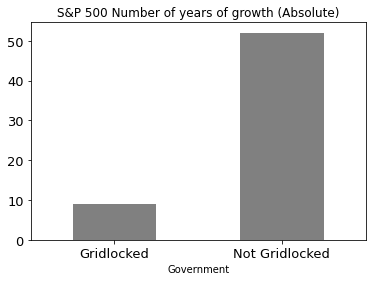

In [45]:
mu = stock_gov.groupby('Gridlock').mean().iloc[1,1]

test = stock_gov.fillna(value='No')

relGrid = test.loc[test['growth'] == True].loc[test['Gridlock'] == 'Yes'].sum()['growth']
totGrid = test.loc[test['Gridlock'] == 'Yes'].count()['growth']

relNonGrid = test.loc[test['growth'] == True].loc[test['Gridlock'] == 'No'].sum()['growth']
totNonGrid = test.loc[test['Gridlock'] == 'No'].count()['growth']

df = pd.DataFrame({'Government':['Gridlocked', 'Not Gridlocked'], 'Number of years':[relGrid, relNonGrid]})
ax = df.plot.bar(fontsize=13, x='Government', y='Number of years', rot=0, legend=False, color='grey', title="S&P 500 Number of years of growth (Absolute)")

We see that when the government is not in gridlock, we have more years of growth than when it is gridlocked.

We consider it a growth when the S&P growth is positive.

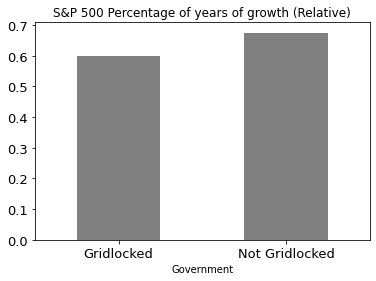

In [94]:
df = pd.DataFrame({'Government':['Gridlocked', 'Not Gridlocked'], 'Percentage of growth':[relGrid/totGrid, relNonGrid/totNonGrid]})
bx = df.plot.bar(fontsize=13, x='Government', y='Percentage of growth', rot=0, legend=False, color='grey', title="S&P 500 Percentage of years of growth (Relative)")

But when we take relative growth in to account, we see that they are similar in growth; this is because we have less data of gridlocked government compared to non gridlocked government (15 vs. 76)

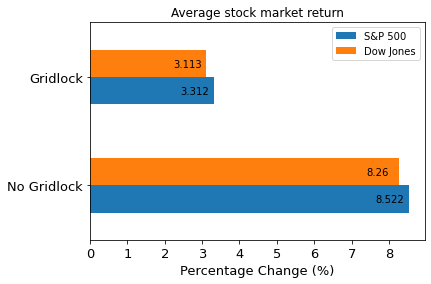

In [47]:
one = stock_gov.groupby('Gridlock').mean().iloc[0,1]
two = stock_gov.groupby('Gridlock').mean().iloc[1,1]
three = stock_gov.groupby('Gridlock').mean().iloc[0,0]
four = stock_gov.groupby('Gridlock').mean().iloc[1,0]

Grid = [one,two]
NonGrid = [three,four]
index = ['No Gridlock','Gridlock']

df = pd.DataFrame({'S&P 500':Grid,'Dow Jones':NonGrid},index=index)
cx = df.plot.barh(fontsize = 13, rot=0, title="Average stock market return")
cx.set_xlabel("Percentage Change (%)",fontsize=13)
for p in cx.patches:
    cx.annotate(round(p.get_width(),3), (p.get_x() + p.get_width(), p.get_y()), xytext=(-33, 10), textcoords='offset points')

The graph above shows that when there is no gridlock, the magnitude of growth is higher than when there is a gridlock.

### Data Analysis & Results

In [48]:
stock_gov.groupby('Gridlock').mean()

,Dow Jones % Change,S&P 500 % Change,growth
Gridlock,,,
No,8.260390,8.521930,0.675325
Yes,3.112667,3.311679,0.600000


From this table, we see that both Dow Jones and S&P changes for gridlocked governemnt is less than not gridlocked government, so maybe the not gridlocked government is better than the gridlocked government for the stock market. 

In [49]:
stock_gov.loc[stock_gov['growth'] == True]

,Dow Jones % Change,S&P 500 % Change,Gridlock,Tie,growth
Year,,,,,
1928,48.22,37.882220,No,No,True
1933,66.69,44.075145,No,No,True
1935,38.53,41.368421,No,No,True
1936,24.82,27.922561,No,No,True
1938,28.06,24.549763,No,No,True
...,...,...,...,...,...
2013,26.50,29.600000,Yes,No,True
2014,7.52,11.390000,Yes,No,True
2016,13.42,9.540000,No,No,True


In [50]:
mu = stock_gov.groupby('Gridlock').mean().iloc[1,1]
stock_gov.groupby('Gridlock').mean()

,Dow Jones % Change,S&P 500 % Change,growth
Gridlock,,,
No,8.260390,8.521930,0.675325
Yes,3.112667,3.311679,0.600000


In [51]:
# Total mean
mean = stock_gov.mean()[1]
stock_gov['mean'] = stock_gov.mean()[1]
stock_gov.mean()

Dow Jones % Change    7.421087
S&P 500 % Change      7.672432
growth                0.663043
mean                  7.672432
dtype: float64

In [52]:
testingNew = stock_gov.loc[stock_gov['Gridlock'] == 'Yes']

In [53]:
newstd = np.std(testingNew,ddof=1)
newstd

Dow Jones % Change    2.236490e+01
S&P 500 % Change      2.158848e+01
growth                5.070926e-01
mean                  1.838704e-15
dtype: float64

In [54]:
(mu-mean) / (newstd[1]/math.sqrt(15))

-0.7823211570690959

In [55]:
stock_gov.to_csv(r'C:\Program Files\Common Files\csv\stock_gov.csv', header = True)

In [56]:
stock_gov=pd.read_csv('C:\Program Files\Common Files\csv\stock_gov.csv')
stock_gov

,Year,Dow Jones % Change,S&P 500 % Change,Gridlock,Tie,growth,mean
0,1928,48.22,37.882220,No,No,True,7.672432
1,1929,-17.17,-11.909647,No,No,False,7.672432
2,1930,-33.77,-28.484852,No,No,False,7.672432
3,1931,-52.67,-47.066493,Yes,Yes,False,7.672432
4,1932,-23.07,-14.778325,Yes,Yes,False,7.672432
...,...,...,...,...,...,...,...
87,2015,-2.23,-0.730000,No,No,False,7.672432
88,2016,13.42,9.540000,No,No,True,7.672432
89,2017,25.08,19.420000,No,No,True,7.672432
90,2018,-5.63,-6.240000,No,No,False,7.672432


In [57]:
stock_gov_gridlock = stock_gov[stock_gov['Gridlock']=='Yes']
stock_gov_gridlock

,Year,Dow Jones % Change,S&P 500 % Change,Gridlock,Tie,growth,mean
3,1931,-52.67,-47.066493,Yes,Yes,False,7.672432
4,1932,-23.07,-14.778325,Yes,Yes,False,7.672432
53,1981,-9.23,-9.730000,Yes,No,False,7.672432
54,1982,19.60,14.760000,Yes,No,True,7.672432
55,1983,20.27,17.270000,Yes,No,True,7.672432
56,1984,-3.74,1.400000,Yes,No,True,7.672432
57,1985,27.66,26.330000,Yes,No,True,7.672432
58,1986,22.58,14.620000,Yes,No,True,7.672432
73,2001,-7.10,-13.040000,Yes,Yes,False,7.672432
74,2002,-16.76,-23.370000,Yes,Yes,False,7.672432


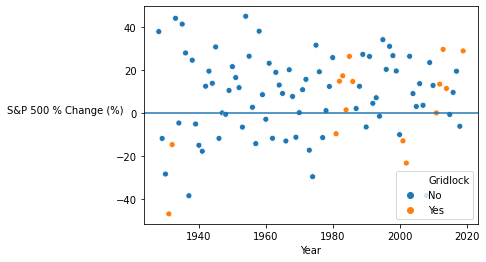

In [91]:
chart_SP = sns.scatterplot(x=stock_gov['Year'], y = stock_gov['S&P 500 % Change'], hue = stock_gov['Gridlock'])
chart_SP.set_ylabel('S&P 500 % Change (%)', rotation=0,labelpad=50)
chart_SP.axhline(0)

However, when we delve deeper into this, we see that there were some special events that causes a lower return on the stock market for both government.

1929-1939, there is a huge loss in the stock market because of the Great Depression

2001, the early 2001 recession

2008, U.S. Financial Crisis with the Housing Market crash followed by a speedy recovery.

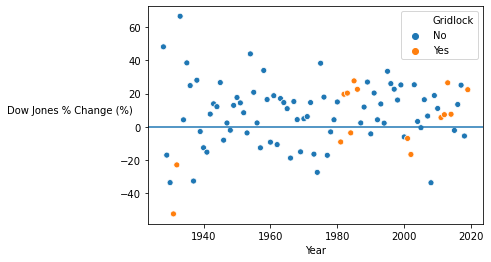

In [92]:
chart_DJ = sns.scatterplot(x=stock_gov['Year'], y = stock_gov['Dow Jones % Change'], hue = stock_gov['Gridlock'])
chart_DJ.set_ylabel('Dow Jones % Change (%)', rotation=0,labelpad=50)
chart_DJ.axhline(0)

From this scatter plot, we can see that gridlock number over zero is more than gridlock number below zero.But not too much. So we can not determine the effect. We need t test. 

In [60]:
gridlock_DowJones_mean = stock_gov_gridlock['Dow Jones % Change'].mean()
DowJones_mean = stock_gov['Dow Jones % Change'].mean()

In [61]:
gridlock_DowJones_StandardDeviation = stock_gov_gridlock['Dow Jones % Change'].std()

using the t test formula, we can get the value of t.But first, we need to calculate out standard error for stock_gov_gridlock

In [62]:
stock_gov_gridlock.shape

(15, 7)

In [63]:
gridlock_DowJones_StandardError = gridlock_DowJones_StandardDeviation/math.sqrt(15)

In [64]:
gridlock_DowJones_t = (gridlock_DowJones_mean-DowJones_mean)/gridlock_DowJones_StandardError

In [65]:
gridlock_DowJones_t

-0.7460995568432354

for p value == 0.05, from a t distribution table, and knowing that df = 14, doing a two tailed test, we get the t critical of +-2.1448, this 
is more extreme than the t value for gridlock_DowJones_t, so we fail to reject the null hypothesis.

In [66]:
gridlock_SP_mean = stock_gov_gridlock['S&P 500 % Change'].mean()
SP_mean = stock_gov['S&P 500 % Change'].mean()

In [67]:
gridlock_SP_StandardDeviation = stock_gov_gridlock['S&P 500 % Change'].std()
gridlock_SP_StandardDeviation 

21.588481044390463

In [68]:
gridlock_SP_StandardError = gridlock_SP_StandardDeviation/math.sqrt(15)

In [69]:
gridlock_SP_t = (gridlock_SP_mean-SP_mean)/gridlock_SP_StandardError

In [70]:
gridlock_SP_t

-0.7823211570690959

for p value == 0.05, from a t distribution table, and knowing that df = 14, doing a two tailed test, we get the t critical of +-2.1448, this 
is more extreme than the t value for gridlock_SP_t, so we fail to reject the null hypothesis.

In [71]:
stock_gov_np = stock_gov['Dow Jones % Change'].to_numpy()

In [72]:
model = AutoReg(stock_gov_np, lags=1)

In [73]:
model_fit = model.fit()

In [74]:
result_2020 = model_fit.predict(len(stock_gov_np), len(stock_gov_np))

In [75]:
result_2020

array([6.87235657])

In [76]:
stock_gov

,Year,Dow Jones % Change,S&P 500 % Change,Gridlock,Tie,growth,mean
0,1928,48.22,37.882220,No,No,True,7.672432
1,1929,-17.17,-11.909647,No,No,False,7.672432
2,1930,-33.77,-28.484852,No,No,False,7.672432
3,1931,-52.67,-47.066493,Yes,Yes,False,7.672432
4,1932,-23.07,-14.778325,Yes,Yes,False,7.672432
...,...,...,...,...,...,...,...
87,2015,-2.23,-0.730000,No,No,False,7.672432
88,2016,13.42,9.540000,No,No,True,7.672432
89,2017,25.08,19.420000,No,No,True,7.672432
90,2018,-5.63,-6.240000,No,No,False,7.672432


In [77]:
df_DowJones = stock_gov['Dow Jones % Change'].to_frame()

In [78]:
df_DowJones.columns

Index(['Dow Jones % Change'], dtype='object')

In [79]:
df_DowJones['SMA_10'] = df_DowJones.rolling(10, min_periods=1).mean()

In [80]:
df_DowJones['SMA_20'] = df_DowJones['Dow Jones % Change'].rolling(20, min_periods=1).mean()

In [81]:
df_DowJones

,Dow Jones % Change,SMA_10,SMA_20
0,48.22,48.220000,48.220000
1,-17.17,15.525000,15.525000
2,-33.77,-0.906667,-0.906667
3,-52.67,-13.847500,-13.847500
4,-23.07,-15.692000,-15.692000
...,...,...,...
87,-2.23,6.330000,7.554500
88,13.42,6.043000,6.925000
89,25.08,7.908000,7.047000
90,-5.63,10.729000,5.960500


Text(0, 0.5, 'Dow Jones % Change (%)')

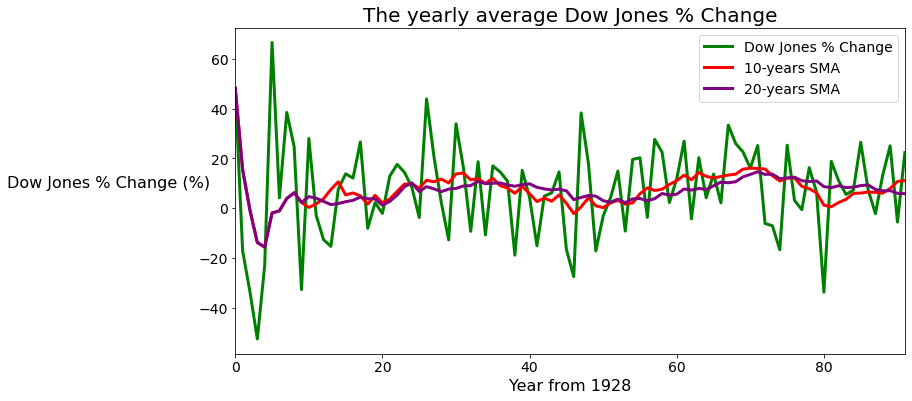

In [100]:
colors = ['green', 'red', 'purple']

# line plot - the yearly average air temperature in Barcelona
df_DowJones.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Dow Jones % Change', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average Dow Jones % Change', fontsize=20)
plt.xlabel('Year from 1928', fontsize=16)
plt.ylabel('Dow Jones % Change (%)', rotation = 0, labelpad = 90, fontsize=16)

From this graph we can see that there is two trends of increase(from around 1948 to 1968 and from around 1988 to 2000) of the years from 1928 to 2019, and from the above plot chart_DJ, we can see the increase do not happen when the government is gridlocked, so from these two graph, we see that there is no effect, the null hypothesis is true.

In [83]:
df_SP_ = stock_gov['S&P 500 % Change'].to_frame()

In [84]:
df_SP_

,S&P 500 % Change
0,37.882220
1,-11.909647
2,-28.484852
3,-47.066493
4,-14.778325
...,...
87,-0.730000
88,9.540000
89,19.420000
90,-6.240000


In [85]:
df_SP_['SMA_10'] = df_SP_.rolling(10, min_periods=1).mean()

In [86]:
df_SP_['SMA_20'] = df_SP_['S&P 500 % Change'].rolling(20, min_periods=1).mean()

Text(0, 0.5, 'S&P 500 % Change (%)')

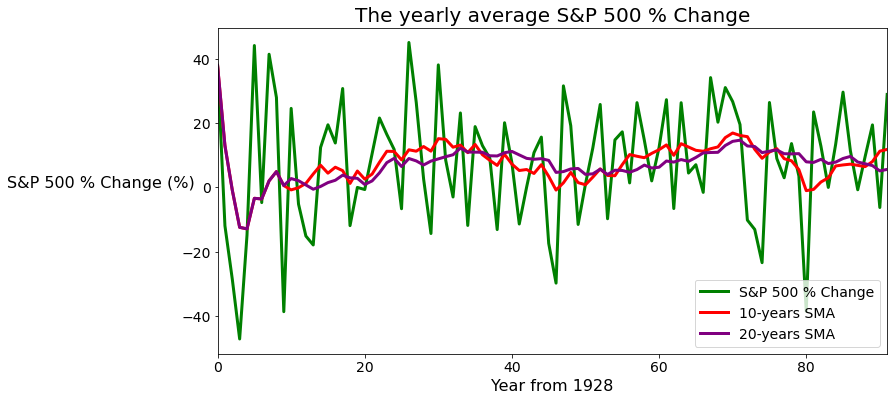

In [97]:
colors = ['green', 'red', 'purple']

# line plot - the yearly average air temperature in Barcelona
df_SP_.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['S&P 500 % Change', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average S&P 500 % Change', fontsize=20)
plt.xlabel('Year from 1928', fontsize=16)
plt.ylabel('S&P 500 % Change (%)', rotation = 0, labelpad = 80, fontsize=16)

From this graph we can see that there are two trends of increase(from around 1948 to 1968 and from around 1988 to 2000) of the years from 1928 to 2019, and from the above plot chart_SP, we can see the increase also do not happen when the government is gridlocked, so from these two graph, we see there is no effect, the null hypothesis is true.

## Ethics & Privacy

- Do/Will you have permission to use this data/use it for this purpose?

All three datasets we used were web scraped off of wikipedia that were directly provided to the public. Wikipedia states that Wikipedia content can be copied, modified, and redistributed however, the site must be acknowledged as we linked all of the websites and the specific charts we web scraped from. Wikipedia is also a public source of information on the internet that is legal for use according to the copyleft licenses from Creative Commons Attribution-ShareAlike 3.0 Unported License. 

- Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?

Wikipedia’s data has already been anonymized by leaving out information that could track back to the original participant such as name, zip code, birthday, etc. According to the references in each of the wikipedia sources we used, they obtain the stock indexes from companies such as Yahoo Finance or CNN Money that have a partnership with those companies to calculate the index based on their information that is compliant with privacy laws. The party division data on wikipedia is directly taken from the US Senate and House of Representatives historical data that is official from the US Government and posted online available for possible research. Any traces of personal identity of these individuals have also been anonymized as there is no indication of directly exposing the individual other than the number of people in each party. 

- Are there potential biases in your dataset(s), in terms of who composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis?

Some potential biases may include how certain top 500 companies are directly correlated with the government. For example, companies that deal with oil such as ExxonMobil may be influenced on how they obtain oil from foreign countries when the Congress is in gridlock which makes it harder for new proposals to be passed. Some parties may advocate for cleaner energy or less interference in global affairs that if they were not in a gridlock, it would be easier for Congress to propose new laws that affect how Exxon Mobil obtains their oil for their company therefore affecting its own company’s stock market index.

S&P 500 and Dow Jones Industrial Average also has many criterias for companies to be included into the index. For example, Tesla, despite its 600 billion market cap, is not tracked by Dow Jones or S&P 500 as of writing this. This means that the companies selected by S&P Dow Jones Indices are arbitrarily biased. Therefore, it may not truly capture the growth of the stock market.
 
- Are there any other issues related to your topic area, data, and/or analysis that are potentially problematic in terms of data privacy and equitable impact?

Wikipedia is prone to modification by third parties/other users that could manipulate the data. The chances of that happening to information from the government is unlikely as changes are usually made to the writing composition of the articles and not necessarily the hard numbers since those were provided by the government and other financial credible sources. However, there is always a chance it could be false information.
One equitable impact that we could see from this analysis (assuming that gridlocked government does improve the economy) is that politicians could use it to support or go against certain party members from being inaugurated into the House or Senate, by claiming that they should stay in a certain ratio to improve the economy. Rather than being selected due to their ability or characteristics, they would be selected for the “greater good.”

- How will you handle the issues you identified?

We cross referenced the numbers from the party divisions with the official US government site numbers to ensure the data was not modified drastically when creating the wikipedia article. We also looked into Yahoo Finance and MSN stock market history to roughly check if the trends according to the wikipedia data is accurate.
We also found our analysis to be inconclusive, thus removing the worry of political impact by the analysis.


## Conclusion & Discussion

Our project’s intent was to investigate the correlation between the status of a gridlocked or non-gridlocked government to how well the stock market is doing in terms of the Dow Jones and S&P 500 Average Stock Market Indexes percent change from the previous term. We started by web scraping the data of both stock market indexes and keeping track of the earliest term both datasets had which was in 1928. Then we webscraped the data of the party compositions in both the Senate and House of Representatives to see which party had the majority in each branch of Congress and saw if they were gridlocked or not. We merged all the data in a table and created a line chart to measure the percent change from each year. In total, the number of gridlocked governments had more positive percent changes in the stock indexes than non gridlocked governments. 

However, we needed to confirm if this was by chance or if there was a significant difference so we conducted a T-Test to find the p-value that something happened by chance or not. We used the T-test to determine if the means of stock market index growths of a gridlocked vs non gridlocked government are significantly different from each other. We had to use a two tailed test since our graph of stock market index vs gridlocked/non gridlocked party distribution was not a normal distribution. This test showed whether the mean of a sample is significantly greater or less than the mean of average stock market percent change between the two governments. Earlier we calculated the mean percent change of Dow Jones and S&P 500 for each non gridlocked and gridlocked governments that the T-Test would use. In the end, we got a p-value less than 0.05 and we fail to reject the null hypothesis and conclude that there is no significant difference between a gridlocked government and a higher percent change in the stock market indexes. Thus, our hypothesis was incorrect in the sense that the presence of a political gridlock has a positive effect on the U.S stock market growth. However, our data is limited so we can consider this statement inconclusive since this country has not had over 1000 terms to be confident in the data analysis. 


Some limitations we faced were the size and proportion of our dataset. Specifically, the ideal number of observations is around 1000 however, in the context of our question, it is theoretically impossible to get more than 1000 observations since the U.S government has not lasted over 1000 terms. Also, the recording of the stock market indexes we used did not date back to when the government first started in the 1700’s as well. To counter this, we decided to measure the limited number of terms with multiple stock indexes to ensure that our observations are not flawed to some outlier in one of the stock market indexes. Another limitation is the proportion of gridlocked vs non-gridlocked government terms. We had about 10 terms where the government was gridlocked while the other roughly 100 terms were not gridlocked. This may influence our data since a small number of gridlocked terms could be coincidental with how high or low the stock market index was that term. 


## Team Contributions

- Euicheon Hwang worked on t-test of SNP500, party division, overview, topic and visulization for the bar graphs.
- William Luu worked on webscraping the dow jones data and cleaning it, merging the data together, background information, privacy + ethics, conclusion and visualization for the bar graph.
- Alan Zhang worked on the S&P 500 wrangling and cleaning, combined three dataset to one dataframe and visualization for the bar graph.
- Yuhan Liu worked on the congress party composition wrangling and cleaning, the t test for Dow Jones and the visulization for SMA part.
